In [73]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter

In [74]:
data = pd.read_csv('video_metadata (2).csv') # Reading in csv file to a dataframe

In [75]:
nlp = spacy.load("en_core_web_sm") #Loading in NEC algorithm

org_list = [] #Orgs will be identified and appended to this list

for desc in data['video_description']: #for loop iterating over video description data
  doc = nlp(desc)

  for ent in doc.ents:
    if ent.label_ == 'ORG': #If object is identified as an organization, it will be added to list
      org_list.append(ent.text)
    else:
      pass

In [76]:
frequency_counter = Counter(org_list) #Tallying frequency of each unique org

In [77]:
freq_dict = dict(frequency_counter)

new_data = {'col_1': list(freq_dict.keys()), 'col_2' : list(freq_dict.values())} #Cleaning frequency data to be added to new dataframe

df = pd.DataFrame.from_dict(new_data)
sorted_df = df.sort_values(by = ['col_2'], ascending = False) #New dataframe sorted by org frequency (name of org is index)


sorted_df = sorted_df.set_index('col_1')

array([<Axes: ylabel='col_2'>], dtype=object)

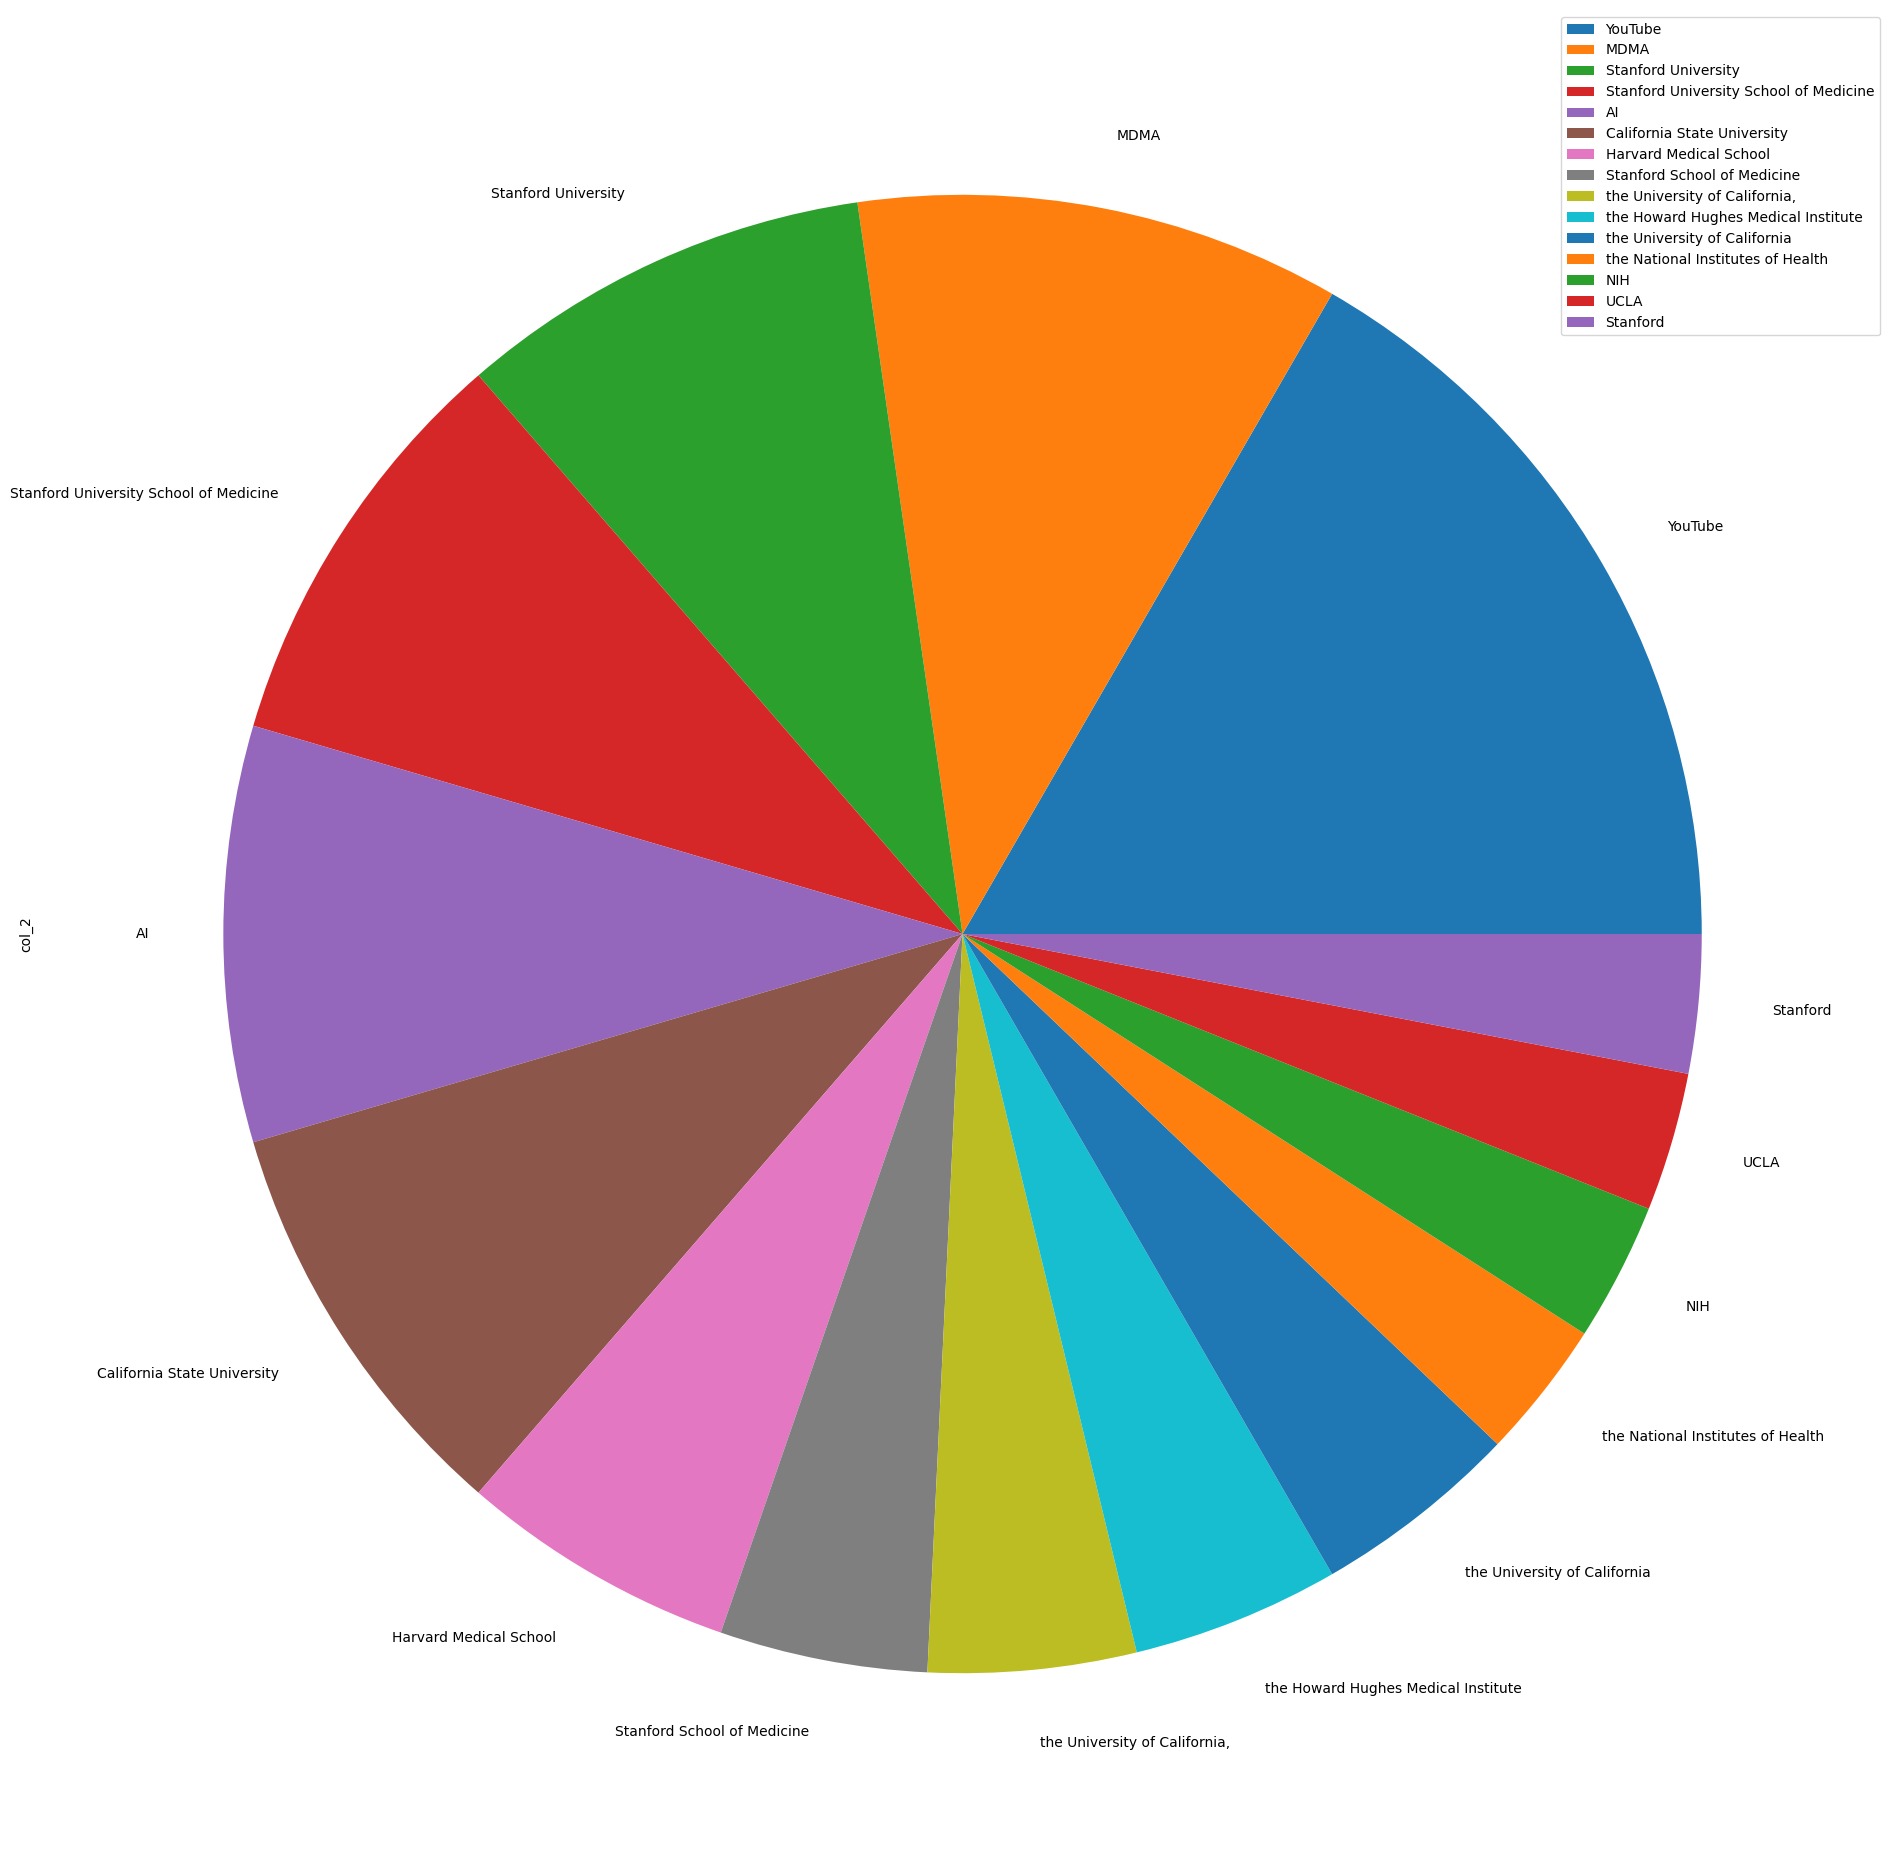

In [78]:
sorted_df[:15].plot.pie(y = 'col_2', subplots = True, figsize = (24,24)) #Pie chart showing the top 15 organizations mentioned in Huberman video descriptions